# Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read the Jwelery data

In [2]:
data = pd.read_csv(r'C://Users/sharg/Desktop/Geeta College Assignments/869/Assignment/jewelry_customers.csv')
list(data)
data.shape
data.describe().transpose()
data.head(n=15)
data.tail(n=10)
data.isna().sum()

['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


,Age,Income,SpendingScore,Savings
495,66,77052,0.707262,6296.417311
496,22,132948,0.889800,2839.786357
497,91,30756,0.303698,15492.004711
498,30,98030,0.411112,16316.842905
499,25,128625,0.816739,4914.117127
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [3]:
# Default plot settings
small_size = 10
medium_size = 12
large_size = 14


plt.rc('figure', figsize=[8.0, 6.0])     # controls the size of the figure
plt.rc('font', size=small_size)          # controls default text sizes
plt.rc('axes', titlesize=small_size)     # fontsize of the axes title
plt.rc('axes', labelsize=medium_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=small_size)    # legend fontsize
plt.rc('figure', titlesize=large_size)  # fontsize of the figure title
plt.rc('axes', grid=True)

# Profiling Report
We used below to explore the data type, strutructe, missingness and correlation

In [4]:
import pandas_profiling ####This helped me to know which columns to drop####
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title='Pandas Profiling Report')

In [5]:
profile

Savings and Spending features are highly correlated with each other.. henced removed spending score from the list

In [5]:
#Visualize 
X= data.copy()
X= X.drop(['SpendingScore'], axis=1)
X.head(10)

,Age,Income,Savings
0,58,77769,6559.829923
1,59,81799,5417.661426
2,62,74751,9258.992965
3,59,74373,7346.334504
4,87,17760,16869.507130
5,29,131578,3535.514352
6,54,76500,6878.884249
7,87,42592,18086.287158
8,83,34384,14783.379086
9,84,27693,17879.558906


## Plot the Raw data

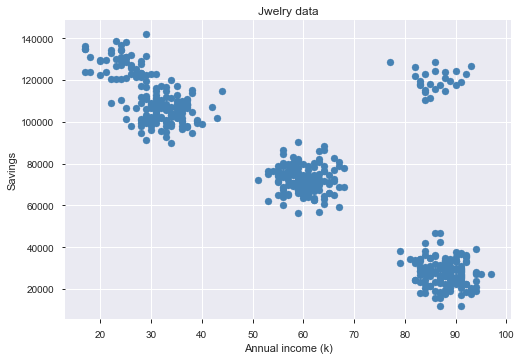

In [6]:
plt.figure()
plt.scatter(data.iloc[:,0], data.iloc[:,1], c="steelblue")
plt.title("Jwelry data");
plt.xlabel('Annual income (k)');
plt.ylabel('Savings');
plt.xticks();
plt.yticks();

# Normalize data

In [7]:
scaler = StandardScaler()
features = ['Income','Age','Savings']
X[features] = scaler.fit_transform(X[features])
X = X[features]

In [8]:
X.shape
X.info()
X.describe().transpose()
X.head(10)
X.tail()

(505, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 3 columns):
Income     505 non-null float64
Age        505 non-null float64
Savings    505 non-null float64
dtypes: float64(3)
memory usage: 12.0 KB


,count,mean,std,min,25%,50%,75%,max
Income,505.0,-2.638154e-17,1.000992,-1.766355,-1.139805,-0.012106,0.878451,1.849048
Age,505.0,5.672031e-17,1.000992,-1.742394,-1.037472,-0.000821,1.077295,1.574888
Savings,505.0,-4.058360e-16,1.000992,-2.399206,-1.018085,0.474782,0.846387,1.645835


,Income,Age,Savings
0,0.062733,-0.042287,-1.072467
1,0.174811,-0.000821,-1.303473
2,-0.021200,0.123577,-0.526556
3,-0.031712,-0.000821,-0.913395
4,-1.606165,1.160228,1.012686
5,1.559204,-1.244802,-1.684141
6,0.027441,-0.208151,-1.007937
7,-0.915567,1.160228,1.258782
8,-1.143838,0.994363,0.590763
9,-1.329920,1.035829,1.216971


,Income,Age,Savings
500,0.714535,-1.286268,0.621787
501,-1.545704,1.409024,1.235201
502,-1.118447,1.284626,0.855313
503,-1.524929,1.326092,1.322452
504,-1.258335,1.243160,0.510463


# K-mean

In [9]:
k_means = KMeans(n_clusters=5, random_state =20)
k_means.fit(X)

KMeans(n_clusters=5, random_state=20)

In [10]:
k_means.labels_

array([2, 2, 2, 2, 1, 3, 2, 1, 1, 1, 4, 0, 0, 0, 2, 4, 2, 1, 1, 4, 0, 4,
       2, 1, 4, 3, 3, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 3, 2,
       2, 3, 4, 3, 0, 2, 1, 0, 3, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 3, 3, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 3, 2, 4, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 2, 3, 1, 2, 3, 0, 2, 2, 0, 0, 3, 0, 3, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 0, 3, 1, 0, 1, 1, 1, 0, 4, 2, 1, 2, 2, 0, 2,
       0, 2, 3, 1, 4, 3, 2, 0, 1, 2, 2, 3, 2, 3, 2, 4, 2, 1, 2, 0, 1, 2,
       1, 4, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 3, 3, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 3, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 3, 2, 1, 1, 1, 1, 2, 1, 0, 3, 0, 1,
       2, 2, 0, 1, 0, 3, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 3, 2,
       2, 2, 4, 2, 0, 1, 3, 3, 3, 1, 2, 0, 1, 1, 0, 0, 2, 2, 4, 2, 2, 1,
       2, 1, 0, 3, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 4, 0, 1,
       1, 0, 4, 1, 1, 3, 2, 0, 0, 2, 0, 1, 1, 0, 2,

Lets look at the centres 

In [11]:
k_means.cluster_centers_

array([[ 0.82744102, -1.08815238,  0.6270464 ],
       [-1.32510593,  1.19238486,  0.97016358],
       [-0.08524639,  0.03879611, -1.00569483],
       [ 1.46050665, -1.44466803, -1.57249636],
       [ 1.23565419,  1.11876151,  0.59588052]])

## WSS Inertia

In [12]:
k_means.inertia_

51.365355635328655

In [13]:
silhouette_score(X, k_means.labels_)

0.8150409250387459

Silhouette score looks good... it is close to 1

## Look at the individual Silhouette scores

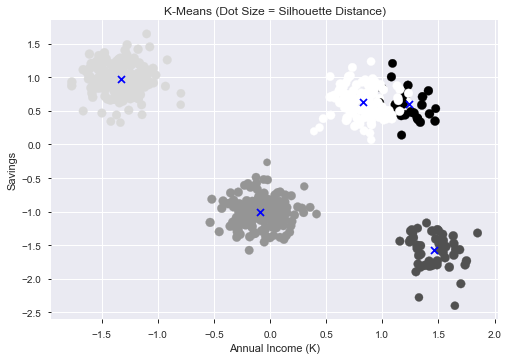

In [14]:
sample_silhouette_values = silhouette_samples(X, k_means.labels_)
sizes = 100*sample_silhouette_values

plt.figure();

plt.scatter(X.iloc[:, 0], X.iloc[:, 2], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 2], marker='x', color='blue')

plt.title("K-Means (Dot Size = Silhouette Distance)");
plt.xlabel('Annual Income (K)');
plt.ylabel('Savings');

In [15]:
sample_silhouette_values = silhouette_samples(X, k_means.labels_)
X_tmp = X.copy()
X_tmp['Cluster ID'] = k_means.labels_
X_tmp['Silhouette'] = sample_silhouette_values
X_tmp = X_tmp.sort_values(['Silhouette'])
X_tmp.head()
X_tmp.tail()

,Income,Age,Savings,Cluster ID,Silhouette
80,-0.026067,-0.000821,-0.265897,2,0.531222
339,0.391707,-1.037472,0.196248,0,0.604944
88,0.305104,-0.125219,-0.623939,2,0.628192
407,1.088200,-0.622811,0.445998,0,0.645510
454,0.901590,-1.161870,0.069791,0,0.650786


,Income,Age,Savings,Cluster ID,Silhouette
211,-1.373472,1.243160,1.078483,1,0.877476
379,-1.397806,1.243160,0.945914,1,0.880104
121,-1.374445,1.201694,1.060476,1,0.880106
178,-1.305113,1.201694,0.983630,1,0.880923
335,-1.350862,1.243160,0.949109,1,0.881229


Linked clusters back to original data.. to review the clusters formed by Kmeans later 

In [16]:
data['Clusters'] = k_means.labels_

In [17]:
data

,Age,Income,SpendingScore,Savings,Clusters
0,58,77769,0.791329,6559.829923,2
1,59,81799,0.791082,5417.661426,2
2,62,74751,0.702657,9258.992965,2
3,59,74373,0.765680,7346.334504,2
4,87,17760,0.348778,16869.507130,1
...,...,...,...,...,...
500,28,101206,0.387441,14936.775389,0
501,93,19934,0.203140,17969.693769,1
502,90,35297,0.355149,16091.401954,1
503,91,20681,0.354679,18401.088445,1


# Interpret clusters

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(k_means.cluster_centers_)
scaler.inverse_transform(k_means.cluster_centers_)

StandardScaler()

array([[ 1.26766025, -1.22254852,  0.55899068],
       [-0.93059243,  1.26299991,  0.90701315],
       [ 0.33559345,  0.00570814, -1.09709264],
       [ 1.91416797, -1.6111135 , -1.67199731],
       [ 1.68454115,  1.18275812,  0.52737925]])

# Exampler

In [19]:
# Let's look at some example rows in each.
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    print(scaler.inverse_transform(X[k_means.labels_==label].head()))


Cluster 0:
[[ 1.1118561  -1.07692453  0.85349941]
 [ 1.11665592 -1.34808644  0.28386493]
 [ 1.34426398 -1.30289279  0.23984969]
 [ 1.14857899 -1.34808644  0.4280636 ]
 [ 1.14815297 -1.21250548  0.5485469 ]]

Cluster 1:
[[-1.21761892  1.22795177  0.95014368]
 [-0.51235772  1.22795177  1.19975814]
 [-0.74547563  1.04717716  0.52218816]
 [-0.93550876  1.09237081  1.15734919]
 [-0.82792461  1.22795177  0.80883696]]

Cluster 2:
[[ 0.48671498 -0.08266416 -1.16481916]
 [ 0.60117224 -0.03747051 -1.39912756]
 [ 0.40099985  0.09811045 -0.61110352]
 [ 0.39026415 -0.03747051 -1.00347289]
 [ 0.45067373 -0.26343877 -1.09936726]]

Cluster 3:
[[ 2.01496079 -1.3932801  -1.78523772]
 [ 1.76531332 -1.34808644 -1.3399461 ]
 [ 2.11118441 -1.93560393 -1.66368398]
 [ 1.94577522 -1.80002297 -1.36108174]
 [ 1.9932338  -1.89041028 -1.4322022 ]]

Cluster 4:
[[1.44156685 1.13756446 0.77366505]
 [1.76789784 1.45392003 0.30192382]
 [1.70538657 1.27314542 0.41573814]
 [1.7627004  1.09237081 0.32245125]
 [1.67752489

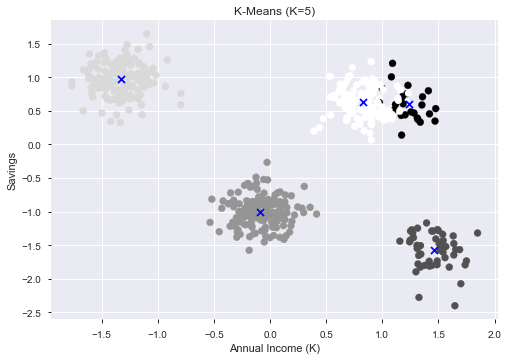

In [20]:
plt.figure();
sc = plt.scatter(X.iloc[:, 0], X.iloc[:, 2],  c=k_means.labels_);
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 2], marker='x', c="blue");
plt.title("K-Means (K=5)");
plt.xlabel('Annual Income (K)');
plt.ylabel('Savings');

# Hyperparameter tunning

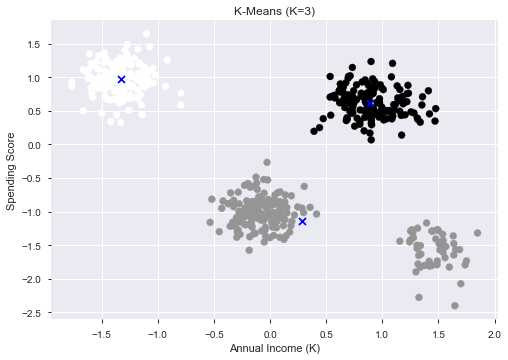

K=3, WCSS=342.71, Sil=0.65


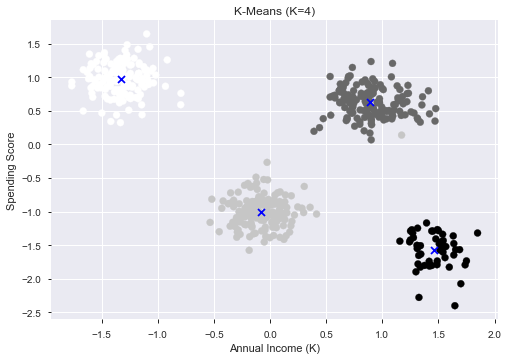

K=4, WCSS=156.51, Sil=0.75


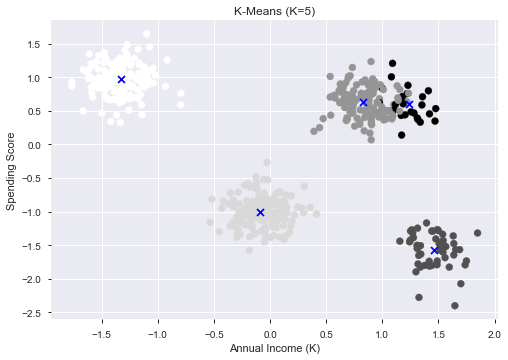

K=5, WCSS=51.37, Sil=0.82


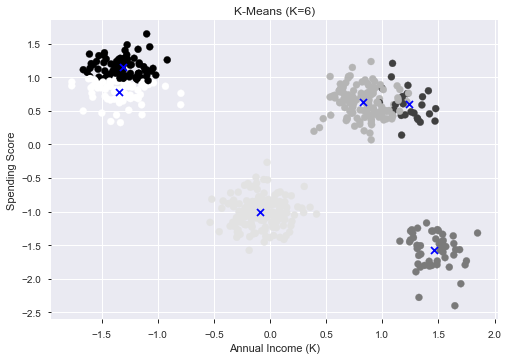

K=6, WCSS=46.07, Sil=0.65


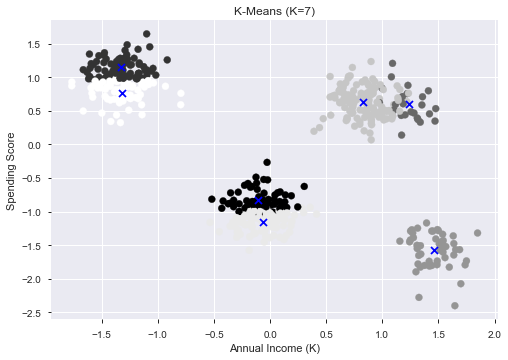

K=7, WCSS=41.73, Sil=0.48


In [21]:
def do_kmeans(data, k):
    k_means = KMeans(init ='k-means++', n_clusters= k, n_init=10, random_state=35)
    k_means.fit(X)

    plt.figure();
    plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 2], marker='x', c="blue")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Annual Income (K)');
    plt.ylabel('Spending Score');
    #plt.savefig('out/simple_kmeans_k{}.png'.format(k))
    plt.show()
    
    wcss = k_means.inertia_
    sil = silhouette_score(data, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(3, 8):
    do_kmeans(X, k)

from above hyperparameter we observed that at K=5 we have got best cluster segments.

# Elbow method
Helps to find the right K values for clustering

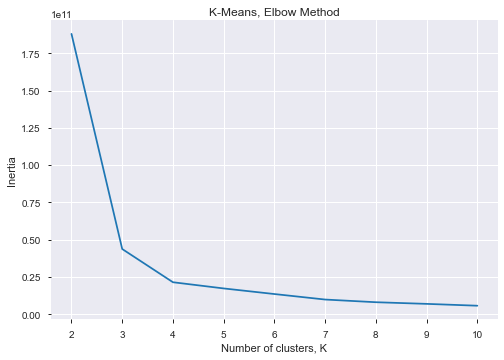

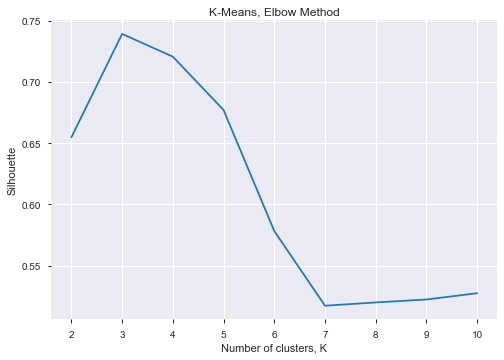

In [23]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state= 35).fit(data)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(data, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

# DSSCAN

In [24]:
db = DBSCAN(eps=0.3, min_samples=4)
db.fit(X)

DBSCAN(eps=0.3, min_samples=4)

In [25]:
db.labels_

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  3,  4,  4,  4,  0,  3,  0,
        1,  1,  3,  4,  3,  0,  1,  3,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        4,  0,  1,  0,  4,  4,  0,  1,  2,  0,  0,  2,  3,  2,  4,  0,  1,
        4,  2,  1,  0,  1,  4,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  4,  1,  1,  4,  0,  4,  0,  0,  2,  0,  3,  0,  1,  1,
        4,  4,  0,  0,  0,  0,  0,  2,  1,  0,  2,  4,  0,  0,  4,  4,  2,
        4,  2,  4,  1,  1,  4,  4,  0,  1,  4,  0,  4,  4,  4,  0,  4,  2,
        1,  4,  1,  1,  1,  4,  3,  0,  1,  0,  0,  4,  0,  4,  0,  2,  1,
        3,  2,  0,  4,  1,  0,  0,  2,  0,  2,  0,  3,  0,  1,  0,  4,  1,
        0,  1,  3,  4,  0,  1,  0,  4,  1,  0,  4,  1,  4,  1,  0,  4,  0,
        1,  0,  4,  0,  1,  0,  0,  1,  1,  1,  0,  0,  4,  2,  2,  1,  4,
        0,  0,  0,  4,  1,  0,  0,  0,  1, -1,  4,  1,  1,  1,  4,  0,  4,
        0,  4,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  4,  2,  4,  1,  0,
        0,  4,  1,  4,  2

In [26]:
silhouette_score(X, db.labels_)

0.7989675529491855

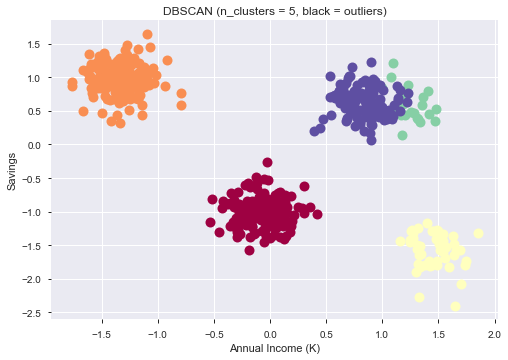

In [37]:
plt.figure();

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = X[db.labels_ == k]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 2], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));
plt.xlabel('Annual Income (K)');
plt.ylabel('Savings');

# Elbow plot for DBscan

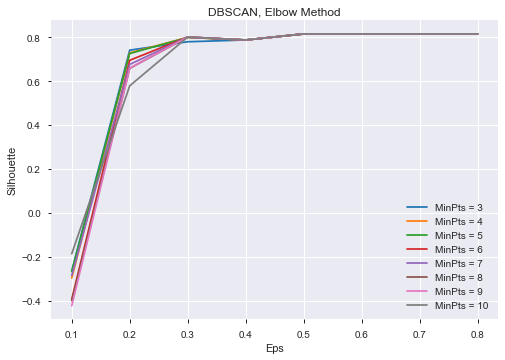

In [28]:
silhouettes = {}

epss = np.arange(0.1, 0.9, 0.1)
minss = [3, 4, 5, 6, 7, 8, 9, 10]

ss = np.zeros((len(epss), len(minss)))

for i, eps in enumerate(epss):
    for j, mins in enumerate(minss):
        db = DBSCAN(eps=eps, min_samples=mins).fit(X)
        if len(set(db.labels_)) == 1:
            ss[i, j] = -1
        else:
            ss[i, j] = silhouette_score(X, db.labels_, metric='euclidean')
    

plt.figure();
#plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label="MinPts = {}".format(minss[i]));
#plt.plot(epss, ss[:, 1]);
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.legend();
#plt.savefig('out/simple_dbscan_elbow');

eps=0.3, min_samples=2, n_clusters=5, sil=0.7793079916363606


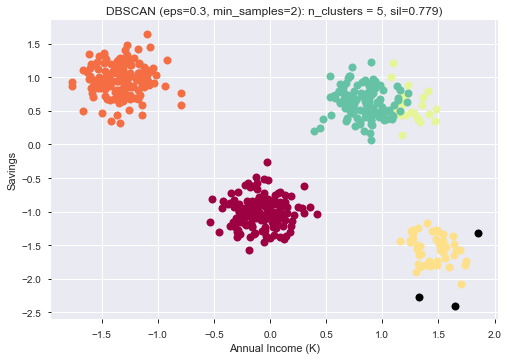

eps=0.1, min_samples=4, n_clusters=17, sil=-0.2966803941903953


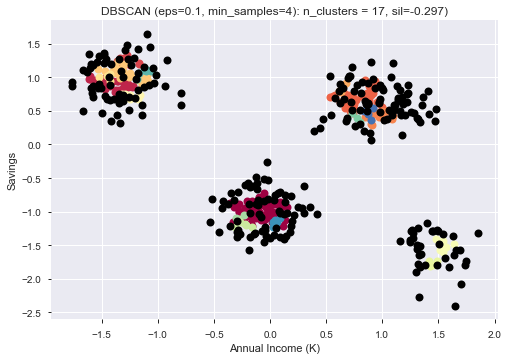

eps=0.3, min_samples=4, n_clusters=5, sil=0.7989675529491855


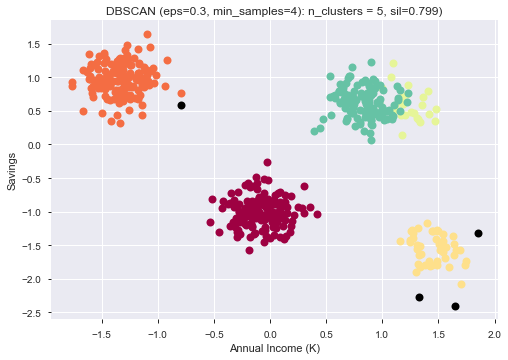

eps=0.3, min_samples=3, n_clusters=5, sil=0.7793079916363606


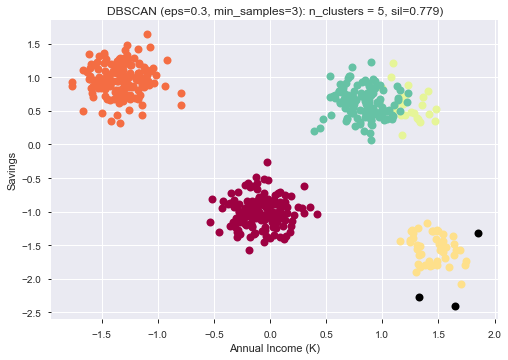

eps=0.6, min_samples=7, n_clusters=4, sil=0.8150409250387459


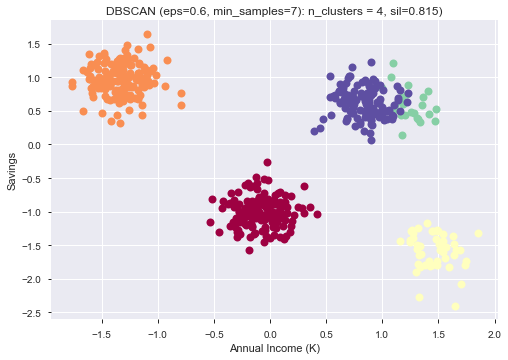

eps=0.36, min_samples=3, n_clusters=5, sil=0.7861696330740497


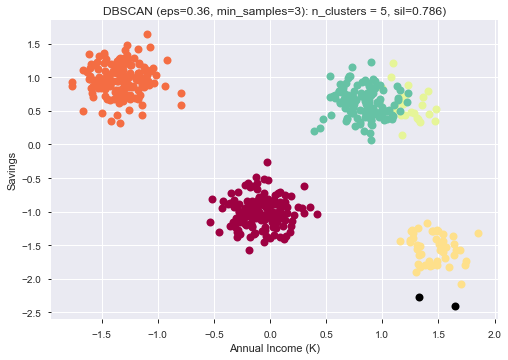

In [36]:
def do_and_plot_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

    unique_labels = set(db.labels_)
    n_clusters = len(unique_labels) - 1
    
    if n_clusters <= 1:
        #print('eps={}, min_samples={}, n_clusters <= 1. Returning.'.format(eps, min_samples))
        #return
        sil = -1
    else:
        sil = silhouette_score(X, db.labels_)
    
    print("eps={}, min_samples={}, n_clusters={}, sil={}".format(eps, min_samples, n_clusters, sil))
    
    plt.figure();
    
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

    for k in unique_labels:
        if k == -1:        # Black used for noise.
            col = [0, 0, 0, 1]
        else:
            col = colors[k]

        xy = X[db.labels_ == k]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 2], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8);


    plt.title('');
    plt.title("DBSCAN (eps={}, min_samples={}): n_clusters = {:d}, sil={:.3f})".format(eps, min_samples, n_clusters, sil));
    plt.xlabel('Annual Income (K)');
    plt.ylabel('Savings');
    #plt.savefig('out/simple_dbscan_{}_{}.png'.format(eps, min_samples))
    plt.show()


do_and_plot_dbscan(X, 0.3, 2)
do_and_plot_dbscan(X, 0.1, 4)
do_and_plot_dbscan(X, 0.3, 4)
do_and_plot_dbscan(X, 0.3, 3)
do_and_plot_dbscan(X, 0.6, 7)
do_and_plot_dbscan(X, 0.36, 3)

From DBscan we also got the K=5 for best clusters

# Hierarchical (Agglomerative)

In [31]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X)

AgglomerativeClustering(n_clusters=5)

In [32]:
agg.labels_

array([2, 2, 2, 2, 0, 3, 2, 0, 0, 0, 4, 1, 1, 1, 2, 4, 2, 0, 0, 4, 1, 4,
       2, 0, 4, 3, 3, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 3, 2,
       2, 3, 4, 3, 1, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 3, 2, 4, 2, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 3, 0, 2, 3, 1, 2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 3, 0, 1, 0, 0, 0, 1, 4, 2, 0, 2, 2, 1, 2,
       1, 2, 3, 0, 4, 3, 2, 1, 0, 2, 2, 3, 2, 3, 2, 4, 2, 0, 2, 1, 0, 2,
       0, 4, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 3, 3, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 3, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 3, 2, 0, 0, 0, 0, 2, 0, 1, 3, 1, 0,
       2, 2, 1, 0, 1, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 3, 2,
       2, 2, 4, 2, 1, 0, 3, 3, 3, 0, 2, 1, 0, 0, 1, 1, 2, 2, 4, 2, 2, 0,
       2, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 4, 1, 0,
       0, 1, 4, 0, 0, 3, 2, 1, 1, 2, 1, 0, 0, 1, 2,

In [33]:
silhouette_score(X, agg.labels_)

0.8150409250387459

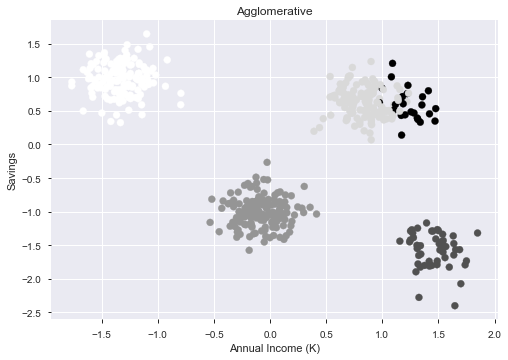

In [35]:
plt.figure();

plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=agg.labels_);
plt.title("Agglomerative");
plt.xlabel('Annual Income (K)');
plt.ylabel('Savings');

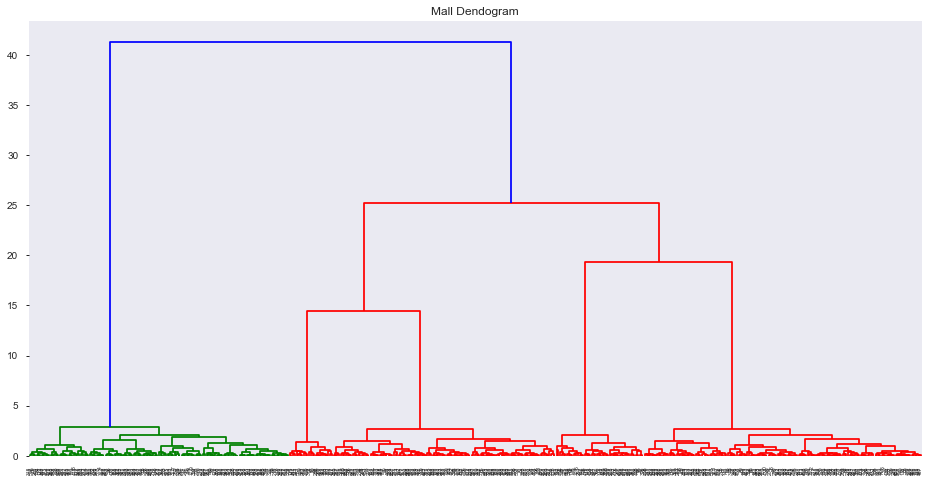

In [38]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Mall Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl);

In [39]:
# Let's find K=5 clusters
K=5
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

In [51]:

from scipy import stats
import seaborn as sns

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
data.describe(include=[np.number]).transpose()

for i, label in enumerate(set(labels)):
    n = data.iloc[labels==label].shape[0]
      
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(n))

    data.iloc[labels==label].describe(include=[np.number]).transpose()

All Data:
Number of Instances: 505


,count,mean,std,min,25%,50%,75%,max
Age,505.00,59.02,24.14,17.00,34.00,59.00,85.00,97.00
Income,505.00,75513.29,35992.92,12000.00,34529.00,75078.00,107100.00,142000.00
SpendingScore,505.00,0.51,0.26,0.00,0.30,0.37,0.77,1.00
Savings,505.00,11862.46,4949.23,0.00,6828.71,14209.93,16047.27,20000.00
Clusters,505.00,1.41,1.11,0.00,1.00,1.00,2.00,4.00
cluster_dendrogram,505.00,3.09,1.60,1.00,1.00,3.00,5.00,5.00
cluster_dbscan,505.00,1.64,1.57,0.00,0.00,1.00,3.00,4.00
Clusters_kmeans,505.00,1.41,1.11,0.00,1.00,1.00,2.00,4.00



Cluster 1:
Number of Instances: 147


,count,mean,std,min,25%,50%,75%,max
Age,147.00,87.78,3.51,79.00,85.00,88.00,91.00,97.00
Income,147.00,27866.10,6448.81,12000.00,23361.00,27771.00,32601.00,46977.00
SpendingScore,147.00,0.33,0.05,0.20,0.30,0.32,0.36,0.47
Savings,147.00,16659.26,1183.85,13470.97,15957.28,16711.07,17433.13,20000.00
Clusters,147.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
cluster_dendrogram,147.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
cluster_dbscan,147.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Clusters_kmeans,147.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00



Cluster 2:
Number of Instances: 25


,count,mean,std,min,25%,50%,75%,max
Age,25.00,86.00,3.66,77.00,84.00,86.00,88.00,93.00
Income,25.00,119944.04,4941.05,110582.00,117347.00,119429.00,123651.00,128596.00
SpendingScore,25.00,0.07,0.04,0.00,0.04,0.06,0.08,0.16
Savings,25.00,14808.68,1159.34,12554.69,14047.39,14773.41,15391.95,17833.09
Clusters,25.00,4.00,0.00,4.00,4.00,4.00,4.00,4.00
cluster_dendrogram,25.00,2.00,0.00,2.00,2.00,2.00,2.00,2.00
cluster_dbscan,25.00,3.00,0.00,3.00,3.00,3.00,3.00,3.00
Clusters_kmeans,25.00,4.00,0.00,4.00,4.00,4.00,4.00,4.00



Cluster 3:
Number of Instances: 126


,count,mean,std,min,25%,50%,75%,max
Age,126.00,32.78,3.79,22.00,30.00,33.00,35.00,44.00
Income,126.00,105265.81,6080.62,89598.00,100760.25,106002.50,108858.75,119877.00
SpendingScore,126.00,0.31,0.05,0.17,0.28,0.31,0.34,0.41
Savings,126.00,14962.78,1061.73,12207.53,14223.79,14976.94,15682.29,17968.55
Clusters,126.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
cluster_dendrogram,126.00,3.00,0.00,3.00,3.00,3.00,3.00,3.00
cluster_dbscan,126.00,4.00,0.00,4.00,4.00,4.00,4.00,4.00
Clusters_kmeans,126.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00



Cluster 4:
Number of Instances: 50


,count,mean,std,min,25%,50%,75%,max
Age,50.00,24.18,3.66,17.00,22.00,24.50,27.00,31.00
Income,50.00,128029.12,5688.90,117108.00,123042.00,128162.00,131435.75,142000.00
SpendingScore,50.00,0.90,0.04,0.81,0.87,0.89,0.93,1.00
Savings,50.00,4087.52,1277.75,0.00,3275.32,4361.97,4986.86,6089.48
Clusters,50.00,3.00,0.00,3.00,3.00,3.00,3.00,3.00
cluster_dendrogram,50.00,4.00,0.00,4.00,4.00,4.00,4.00,4.00
cluster_dbscan,50.00,2.00,0.00,2.00,2.00,2.00,2.00,2.00
Clusters_kmeans,50.00,3.00,0.00,3.00,3.00,3.00,3.00,3.00



Cluster 5:
Number of Instances: 157


,count,mean,std,min,25%,50%,75%,max
Age,157.00,59.96,3.38,51.00,58.00,59.00,62.00,68.00
Income,157.00,72448.06,6240.26,56321.00,68463.00,72027.00,76594.00,90422.00
SpendingScore,157.00,0.77,0.05,0.66,0.74,0.77,0.80,0.91
Savings,157.00,6889.97,1052.28,4077.66,6225.38,6845.06,7497.23,10547.78
Clusters,157.00,2.00,0.00,2.00,2.00,2.00,2.00,2.00
cluster_dendrogram,157.00,5.00,0.00,5.00,5.00,5.00,5.00,5.00
cluster_dbscan,157.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Clusters_kmeans,157.00,2.00,0.00,2.00,2.00,2.00,2.00,2.00


In [45]:
data['cluster_dendrogram'] = labels

In [46]:
data['cluster_dbscan'] = db.labels_

In [47]:
data['Clusters_kmeans'] = k_means.labels_

In [48]:
# we linked all 3 clusters with original data and exported in excel to further study the cluster trends obtained from each clustering technique
data

,Age,Income,SpendingScore,Savings,Clusters,cluster_dendrogram,cluster_dbscan,Clusters_kmeans
0,58,77769,0.79,6559.83,2,5,0,2
1,59,81799,0.79,5417.66,2,5,0,2
2,62,74751,0.70,9258.99,2,5,0,2
3,59,74373,0.77,7346.33,2,5,0,2
4,87,17760,0.35,16869.51,1,1,1,1
...,...,...,...,...,...,...,...,...
500,28,101206,0.39,14936.78,0,3,4,0
501,93,19934,0.20,17969.69,1,1,1,1
502,90,35297,0.36,16091.40,1,1,1,1
503,91,20681,0.35,18401.09,1,1,1,1


In [49]:
df_final=pd.DataFrame(data)

In [50]:
df_final.to_excel('C:\\Users\sharg\Desktop\Geeta College Assignments\831 Marketing Analy\Project\jwerely_datafinal.xlsx', index=False)